# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 

You have 10 coin tosses. 

If you get exactly 5 heads, you win 30 dollars. 

Otherwise you loss 10 dollars. 

Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 

Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 

k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial


Create a functon to calculate the pdf of a binomial distribution

Function name: binomial_p

Input: n, k, p

Output: pdf of a binomial distribution

Example: binomial_p(10, 2, 0.4) = 0.12093235199999998


In [1]:
function binomial_p(n,k,p)
   return (factorial(n)./(factorial(k).*factorial(n.-k)).*p.^k.*(1 .- p).^(n-k))
    
end

binomial_p (generic function with 1 method)

In [22]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [2]:
Prob_Winning_the_bet=binomial_p(10,5,0.4)

0.20065812480000003

The chance of lossing the bet:

In [3]:
Prob_losing_the_bet=1 .- binomial_p(10,5,0.4)

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

The expected outcome or probability of winning this bet is 0.20. As,from the outcome, 
the lossing probability is higher than winning so I am expecting to lose money in the game.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [24]:
Prob_Winning_the_bet=binomial_p(10,4,0.4)

0.250822656

In [25]:
Prob_losing_the_bet=1 .- Prob_Winning_the_bet

0.749177344

If the chance of getting head is approximately 0.4. Then the probability of winning the bet is lesser than losing the bet. So, without changing the probability of getting head higher than 0.5 it is not possible to win.

# Question 2
### (Chi-Square) Complete the following exercises 

#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise

In [4]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\Rasel\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Manifest.toml`


In [5]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics
using Polynomials: Polynomial, fit, coeffs
using Plots
using Random
using Statistics

In [70]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [71]:
line_fit=fit(x,y_observed,1)

Polynomial(-2.32842558703944 + 3.2327978846080394*x)

In [72]:
fit_coeff=coeffs(line_fit)

2-element Vector{Float64}:
 -2.32842558703944
  3.2327978846080394

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit


Function name: chisqr

Input: b, m, x, y_observed, sigma

m and b are the coefficients in the first order polynomial in which m * x + b = y_fit

Output: Chi-square value of the polynomial model

In [73]:
function chisqr(b,m, x,y_observed,sigma)
    return sum((y_observed .- m .* x .- b) .^ 2/sigma .^2)
    
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list

7.340831507683206

In [169]:
chi2_list=[]
for i=1:10000
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
fit_coeff= coeffs(fit(x,y_observed,1))
push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2], x,y_observed,sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [170]:
df=mean(chi2_list)

8.971777964825073

The mean value(degree of freedom) is always less than 11 which define that the chisqr from the defination is not correct. It shows a better fit to the histogram at the mean value.  

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [171]:
chi2=di.Chisq(df)

Distributions.Chisq{Float64}(ν=8.971777964825073)

In [176]:
x_dist=0:0.1:30
chi2=di.Chisq(df)
di.pdf(chi2,1)

0.0023731329397539383

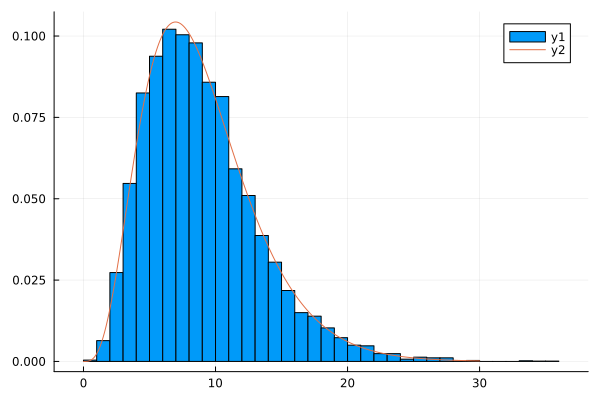

In [177]:
histogram(chi2_list, bin=50, normalize=true)
plot!(x_dist, di.pdf.(di.Chisq(df),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [15]:
m_range=1:0.01:5;
b_range=-7:0.01:3;

In [16]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

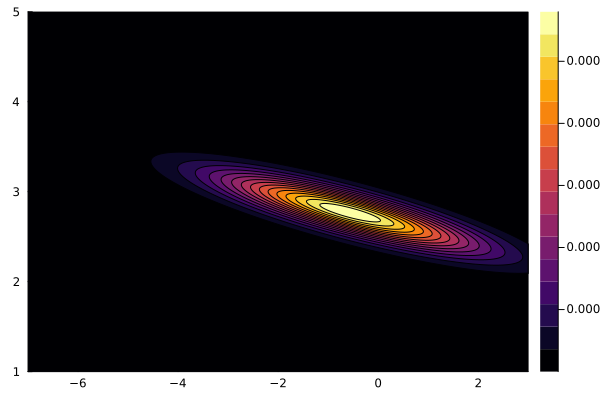

In [17]:
contourf(b_range,m_range,p_chi2poly)

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

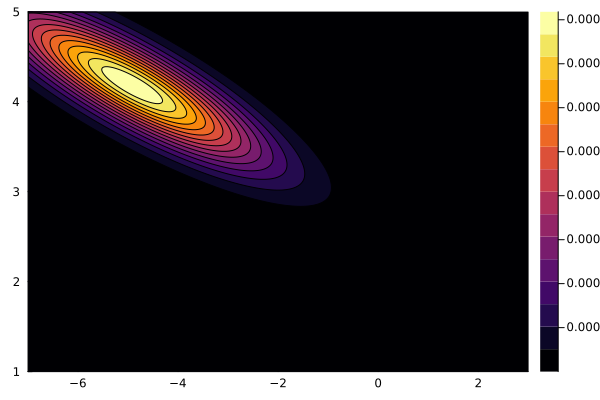

In [181]:
x=0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range,m_range,p_chi2poly)

The change in the data steps to a lower value provide the chisqr less squished. As there is compressed in data scale it says that there will be harder to measure the slope but intercepts changes slowly.

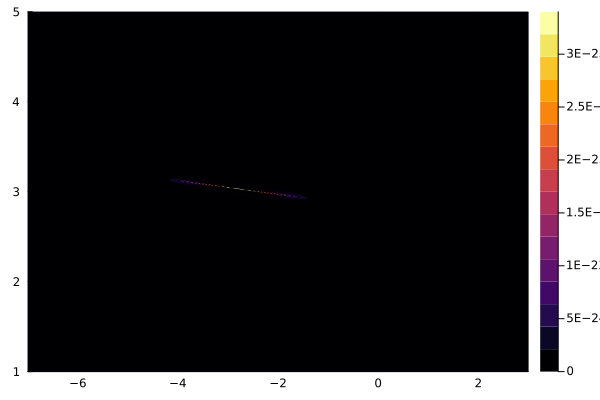

In [180]:
x=0:0.2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range,m_range,p_chi2poly)

The change in the data steps too much lower value provide the chisqr more tighten. As there is compressed in data scale it says that there will be harder to measure the slope and intercepts changes.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

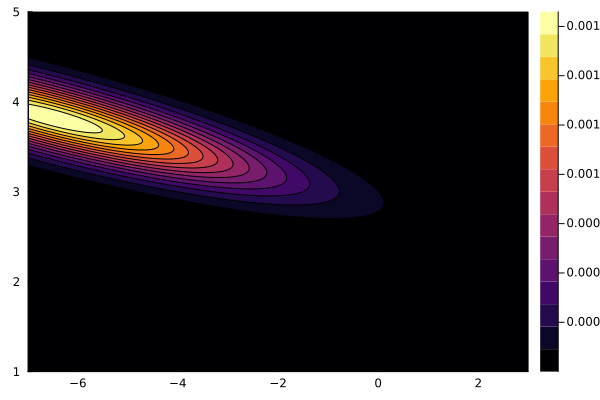

In [20]:
x=0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range,m_range,p_chi2poly)

The change in the sigma to a higher value provide the chisqr much squasher. It says that the slope and intercepts are anticorrelated, there will be change of slope lesser than the intercepts. Again, there will be much extention of major axis length which is characterize by pearson correlation coefficient.

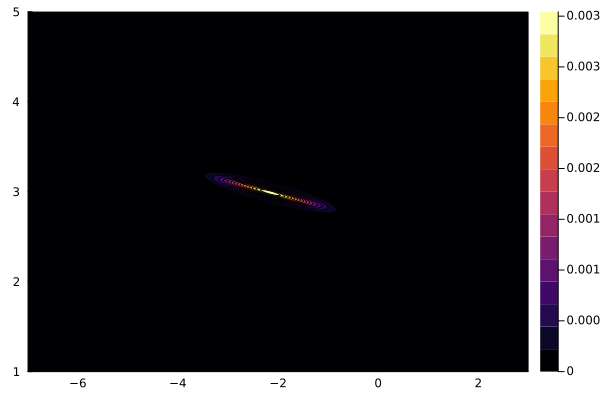

In [21]:
x=0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
contourf(b_range,m_range,p_chi2poly)

The change in the sigma to a much lower value provide the chisqr much tighter. It says that the slope and intercepts are anticorrelated, there will be change of slope which affects the probality distribution function much higher than the intercepts. Again, there will be less extention of major axis length which is characterize by pearson correlation coefficient.